In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df_7 = pd.read_csv('data/info2/job_skills.csv')
fuente_7 = "https://www.kaggle.com/datasets/asaniczka/data-science-job-postings-and-skills?select=job_skills.csv"


# fuente_7 =  https://github.com/madnight/githut
# ...

In [4]:
df_7

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."
...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"Dashboard development, Reporting, Power BI, SQ..."
12213,https://www.linkedin.com/jobs/view/corporate-a...,"Investigation, Antimoney laundering, Fraud, Ba..."
12214,https://www.linkedin.com/jobs/view/senior-data...,"Data Science, Quantitative Modeling, SQL, Data..."
12215,https://www.linkedin.com/jobs/view/senior-data...,"Data Engineering, Data Quality, SQL, Python, T..."


In [5]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_link    12217 non-null  object
 1   job_skills  12212 non-null  object
dtypes: object(2)
memory usage: 191.0+ KB


In [6]:
df_7 = df_7.dropna()

In [7]:
df_7['skill_count'] = df_7['job_skills'].str.split(', ').apply(len)
df_7

C:\Users\guill\AppData\Local\Temp\ipykernel_13768\2272534376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7['skill_count'] = df_7['job_skills'].str.split(', ').apply(len)


,job_link,job_skills,skill_count
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",27
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",23
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",27
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",41
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",17
...,...,...,...
12212,https://uk.linkedin.com/jobs/view/data-reporti...,"Dashboard development, Reporting, Power BI, SQ...",18
12213,https://www.linkedin.com/jobs/view/corporate-a...,"Investigation, Antimoney laundering, Fraud, Ba...",62
12214,https://www.linkedin.com/jobs/view/senior-data...,"Data Science, Quantitative Modeling, SQL, Data...",14
12215,https://www.linkedin.com/jobs/view/senior-data...,"Data Engineering, Data Quality, SQL, Python, T...",31


In [ ]:
# Convertimos los skills a minúsculas

skills = ''
for skill in df_7.job_skills:
    skills += skill.lower()

In [ ]:
# Separamos cada skill mediante split

skills = skills.split(', ')
skills[:10]

['machine learning',
 'programming',
 'python',
 'scala',
 'java',
 'data engineering',
 'distributed computing',
 'statistical modeling',
 'optimization',
 'data pipelines']

In [10]:
df = pd.DataFrame(skills)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302739 entries, 0 to 302738
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       302739 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [12]:
from collections import Counter
counts = Counter(skills) 
common_skills = counts.most_common(15)
common_skills

[('python', 4400),
 ('sql', 4220),
 ('communication', 2428),
 ('data analysis', 2334),
 ('data visualization', 2259),
 ('machine learning', 2026),
 ('tableau', 1644),
 ('aws', 1615),
 ('communication skills', 1607),
 ('project management', 1572),
 ('r', 1505),
 ('data modeling', 1427),
 ('spark', 1372),
 ('problem solving', 1363),
 ('data warehousing', 1316)]

In [13]:
# Create DataFrame
df = pd.DataFrame(common_skills, columns=['skill', 'count'])

# Normalize skill names
df['skill'] = df['skill'].replace({
    'communication skills': 'communication'
})

# Group by skill and sum counts
grouped_df = df.groupby('skill', as_index=False)['count'].sum()

# Sort by count descending (optional)
grouped_df = grouped_df.sort_values(by='count', ascending=False)

grouped_df

,skill,count
9,python,4400
12,sql,4220
1,communication,4035
2,data analysis,2334
4,data visualization,2259
6,machine learning,2026
13,tableau,1644
0,aws,1615
8,project management,1572
10,r,1505


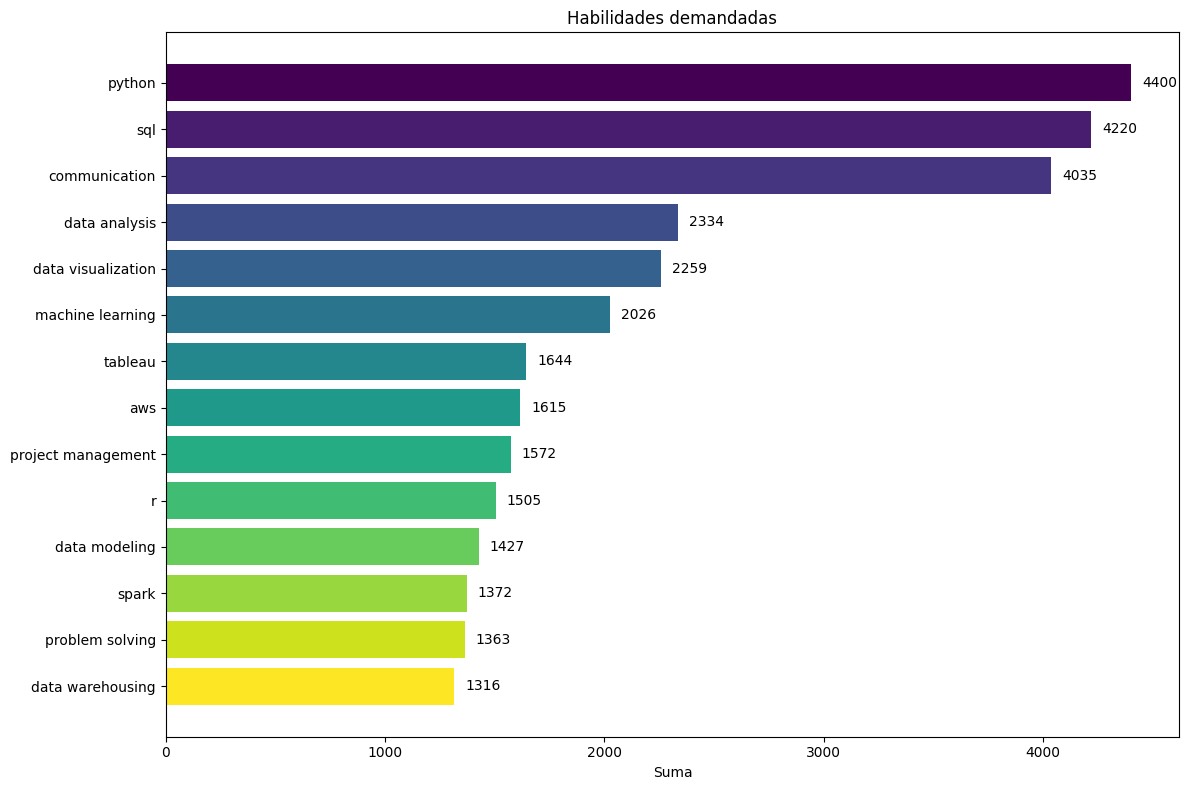

In [14]:
# Define a list of colors (you can use a colormap or a custom list)
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped_df)))

# Plot horizontal bar chart with different colors for each bar
plt.figure(figsize=(12, 8))  # Wider frame for the plot
bars = plt.barh(grouped_df['skill'], grouped_df['count'], color=colors)

# Annotate count on the right-hand side of each bar
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, 
             str(int(bar.get_width())), va='center', ha='left', fontsize=10)

plt.xlabel('Suma')
plt.title('Habilidades demandadas')
plt.gca().invert_yaxis()  # Optional: highest count on top
plt.tight_layout()
plt.show()